<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [2]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
response = requests.get(url)

# Save the file locally
with open('survey-data.csv', 'wb') as f:
    f.write(response.content)

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [4]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


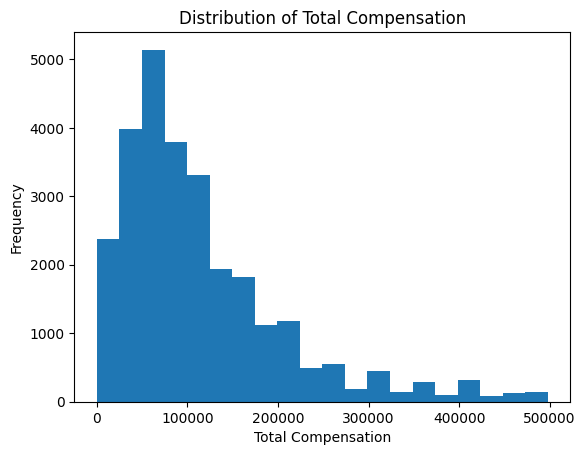

In [ ]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main
"""

df_comptotal = pd.read_sql_query(QUERY, conn)

# Convert 'CompTotal' to numeric, coercing errors
df_comptotal['CompTotal'] = pd.to_numeric(df_comptotal['CompTotal'], errors='coerce')
# Remove rows where 'CompTotal' is NaN after coercion
df_comptotal.dropna(subset=['CompTotal'], inplace=True)

# Filter out extremely large values that might skew the visualization
df_comptotal = df_comptotal[df_comptotal['CompTotal'] < 500000].copy()

plt.hist(df_comptotal['CompTotal'], bins=20)
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')
plt.show()

**Box Plots**

Plot a box plot of Age.


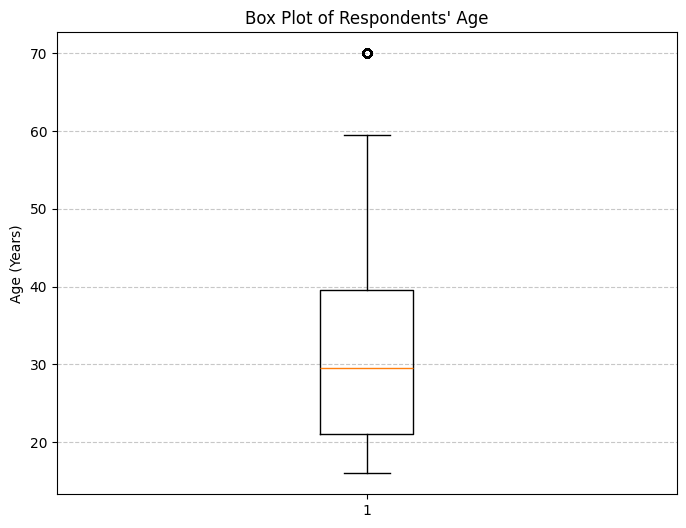

In [12]:
## Write your code here
QUERY = """
SELECT Age
FROM main
"""

df_age = pd.read_sql_query(QUERY, conn)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Map the 'Age' column to numeric values
df_age['AgeNumeric'] = df_age['Age'].map(age_mapping)

plt.figure(figsize=(8, 6))
plt.boxplot(df_age['AgeNumeric'].dropna())
plt.title('Box Plot of Respondents\' Age')
plt.ylabel('Age (Years)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


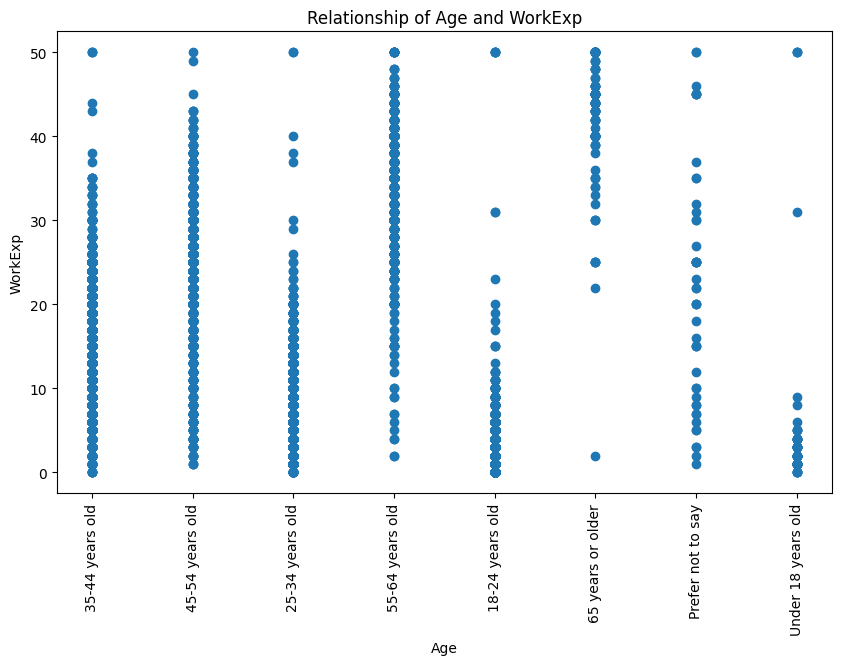

In [13]:
## Write your code here
QUERY = """
SELECT Age,WorkExp
FROM main
"""

df_scatter = pd.read_sql_query(QUERY, conn)
df_scatter = df_scatter.dropna().reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['Age'], df_scatter['WorkExp'])
plt.title('Relationship of Age and WorkExp')
plt.xlabel('Age')
plt.ylabel('WorkExp')
plt.xticks(rotation=90)

plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


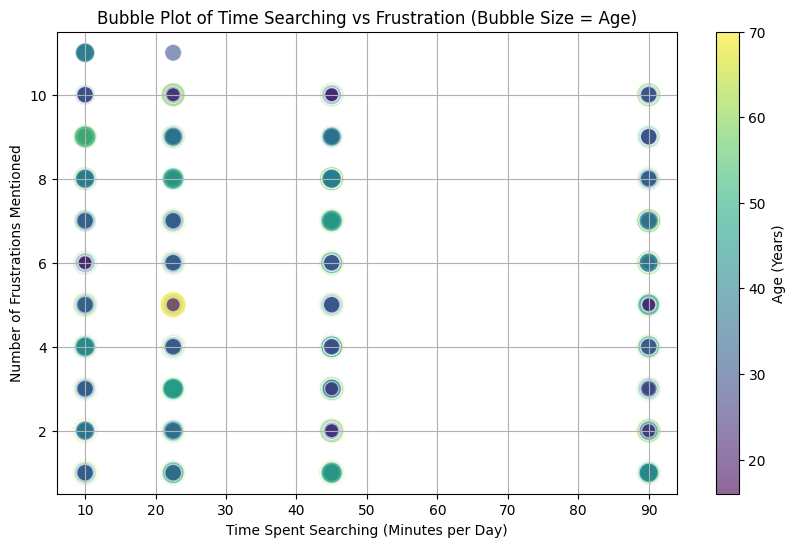

In [14]:
## Write your code here
QUERY = """
SELECT Age,TimeSearching,Frustration
FROM main
"""

df_bubble = pd.read_sql_query(QUERY, conn)
df_bubble = df_bubble.dropna().reset_index(drop=True)
df_bubble['Frustration'].head()
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'More than 120 minutes a day': 150
}
df_bubble['FrustrationCount'] = df_bubble['Frustration'].apply(lambda x: len(x.split(';')))

df_bubble['TimeMinutes'] = df_bubble['TimeSearching'].map(time_mapping)
df_bubble['AgeNumeric'] = df_bubble['Age'].map(age_mapping)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_bubble['TimeMinutes'],
    df_bubble['FrustrationCount'],
    s=df_bubble['AgeNumeric']*5,
    c=df_bubble['AgeNumeric'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)

plt.title('Bubble Plot of Time Searching vs Frustration (Bubble Size = Age)')
plt.xlabel('Time Spent Searching (Minutes per Day)')
plt.ylabel('Number of Frustrations Mentioned')
plt.grid(True)
plt.colorbar(scatter, label='Age (Years)')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


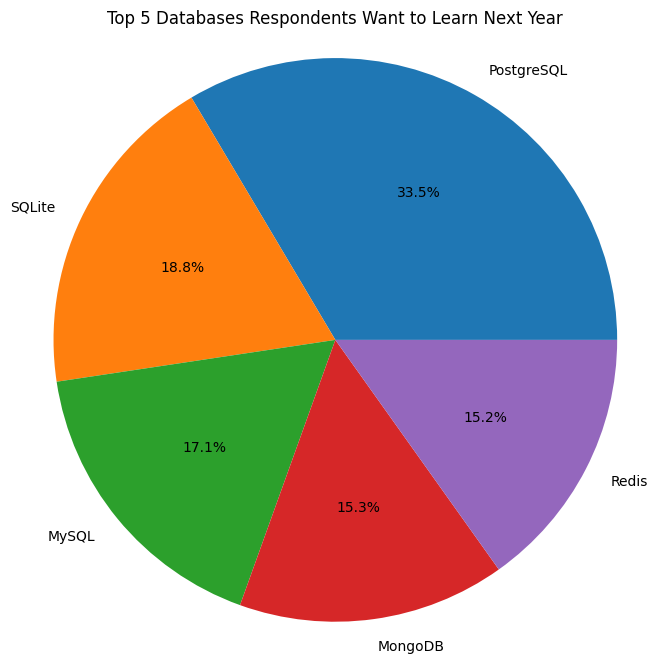

In [15]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""

df_pie = pd.read_sql_query(QUERY, conn)
db_series = df_pie['DatabaseWantToWorkWith'].dropna().str.split(';')
# Flatten the list of lists into a single Series
db_flat = pd.Series([db for sublist in db_series for db in sublist])

# Count occurrences of each database
db_counts = db_flat.value_counts()
# Get top 5 databases
top_5_db = db_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_db, 
    labels=top_5_db.index, 
    autopct='%1.1f%%'
)

plt.title('Top 5 Databases Respondents Want to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio to ensure pie is a circle
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


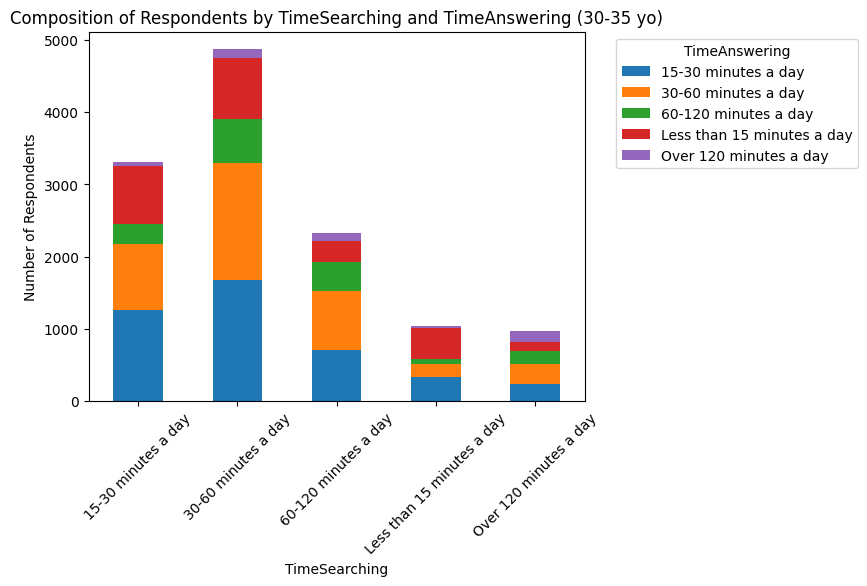

In [18]:
## Write your code here
QUERY = """
SELECT TimeSearching,TimeAnswering ,Age
FROM main
"""

df_stack = pd.read_sql_query(QUERY, conn)

df_stack=df_stack.dropna().reset_index(drop=True)
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Map the 'Age' column to numeric values
df_stack['AgeNumeric'] = df_stack['Age'].map(age_mapping)


df_stack = df_stack[(df_stack['AgeNumeric'] >= 30) & (df_stack['AgeNumeric'] <= 35)] # filter age group
# crosstab for stack plot
df_stack = pd.crosstab(df_stack['TimeSearching'], df_stack['TimeAnswering'])

df_stack.plot(kind='bar', stacked=True)
plt.title('Composition of Respondents by TimeSearching and TimeAnswering (30-35 yo)')
plt.xlabel('TimeSearching')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='TimeAnswering', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


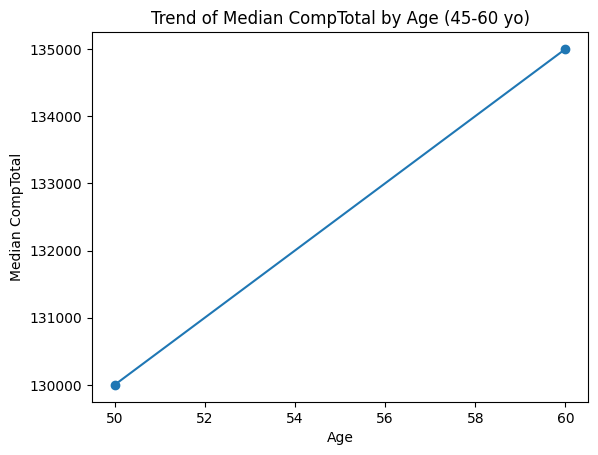

In [19]:
## Write your code here
QUERY = """
SELECT Age,CompTotal 
FROM main
"""
df_line = pd.read_sql_query(QUERY, conn)

df_line = df_line.dropna().reset_index(drop=True)

age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_line['AgeNumeric'] = df_line['Age'].map(age_mapping)


df_line = df_line[(df_line['AgeNumeric'] >= 45) & (df_line['AgeNumeric'] <= 60)]
# group for median line plot
df_line = df_line.groupby('AgeNumeric')['CompTotal'].median().reset_index()

plt.plot(df_line['AgeNumeric'], df_line['CompTotal'], marker='o')
plt.title('Trend of Median CompTotal by Age (45-60 yo)')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


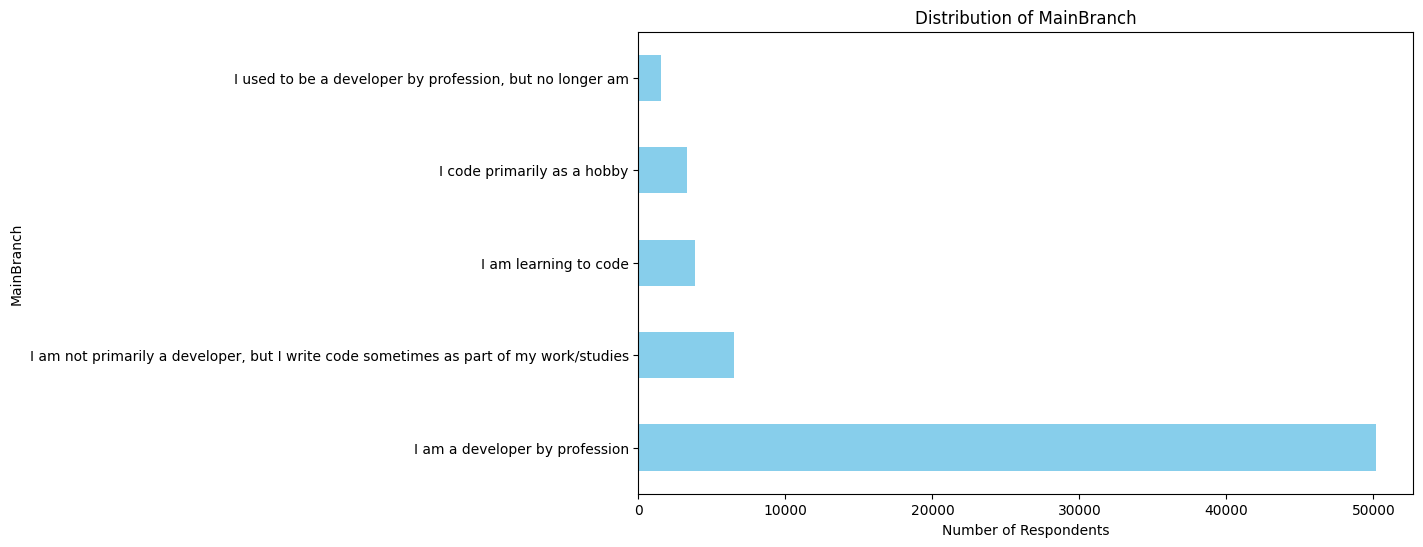

In [20]:
## Write your code here
QUERY = """
SELECT MainBranch
FROM main
"""
df_hbar = pd.read_sql_query(QUERY, conn)

df_hbar = df_hbar["MainBranch"].value_counts()
plt.figure(figsize=(10, 6))
df_hbar.plot(kind='barh', color='skyblue')
plt.title('Distribution of MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [21]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
